Traveling salesman problem apllied to Portugal train network using Dijkstra algorithm

TODO:

- 1) Muitos exemplos
- 2) Desenhos
- 3) Tudo estupidamente comentado
- 4) Aplicações práticas (comboios, voos, peças, construção)

In [216]:
def distance(G,src,node):
    src_pos = G.nodes[src]['pos']
    node_pos = G.nodes[node]['pos']
    return ((src_pos[0]-node_pos[0])**2 + (src_pos[1]-node_pos[1])**2)**(1/2)

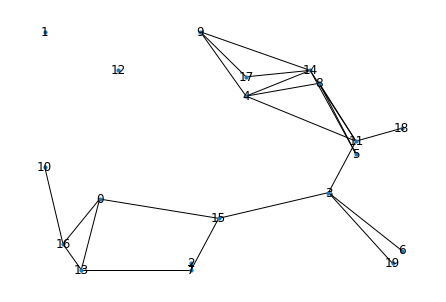

In [224]:
import networkx as nx 
from random import randrange, random

node_number = 20

L = 200
dL = 5
max_distance = 70
min_distance = 1
edginess = 60

x = []
y = []
pos={}

G = nx.Graph()
for i in range(0,node_number):
    rx = randrange(0,L,dL)
    ry = randrange(0,L,dL)
    while rx in x and ry in y:
        rx = randrange(0,L,dL)
        ry = randrange(0,L,dL)
    x.append(rx)
    y.append(ry)
    G.add_node(i,pos=(rx,ry))
    for n in G.nodes():
        d = distance(G,n,i)
        if(d < max_distance and d > min_distance):
            r = random()
            if(r < edginess/100):
                G.add_edge(i,n)


pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos, node_size=10,width=1,with_labels = True)


In [225]:
dist = {}
prev = {}
Q = []

def extract_min(G,source,Q):    
    min=Q[0][0]
    i_min = 0
    for i in range(len(Q)):
        if(distance(G,source,Q[i][0]) < min):
            min=Q[i][0]
            i_min = i
    Q.pop(i_min)
    return min

def send_bottom(node,Q,alt):
    Q.insert(0,(node,alt))
    return
    
def Dijkstra(G, source):
    dist[source] = 0

    for v in G.nodes():
        if v is not source:
            dist[v] = L**2
            prev[v] = -1

        Q.append((v, dist[v]))
        dist[source] = 0


    while len(Q) != 0:
        min_node = extract_min(G,source,Q)
        for neighbor in G.neighbors(min_node):
            if(neighbor not in [n[0] for n in Q]):
                continue
            alt = dist[min_node] + distance(G,min_node, neighbor)
            if alt < dist[neighbor] and dist[min_node] != -1:
                dist[neighbor] = alt
                prev[neighbor] = min_node
                send_bottom(neighbor,Q, alt)

    keys = list(dist.keys())
    for i in keys:
        if dist[i] == L**2:
            dist.pop(i)
    return [dist, prev]

{1: 0}
{0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: -1, 11: -1, 12: -1, 13: -1, 15: -1, 16: -1, 17: -1, 18: -1, 19: -1, 14: -1}


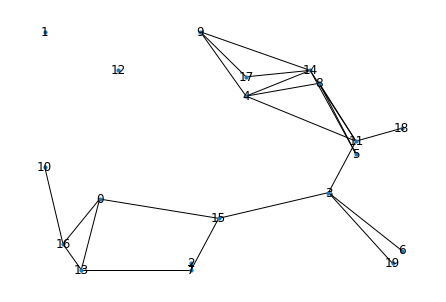

In [229]:
out = Dijkstra(G,1)
print(out[0])
print(out[1])

nx.draw(G,pos, node_size=10,width=1,with_labels = True)